#Campus Recruitment Prediction With Machine Learning for MBA Students


 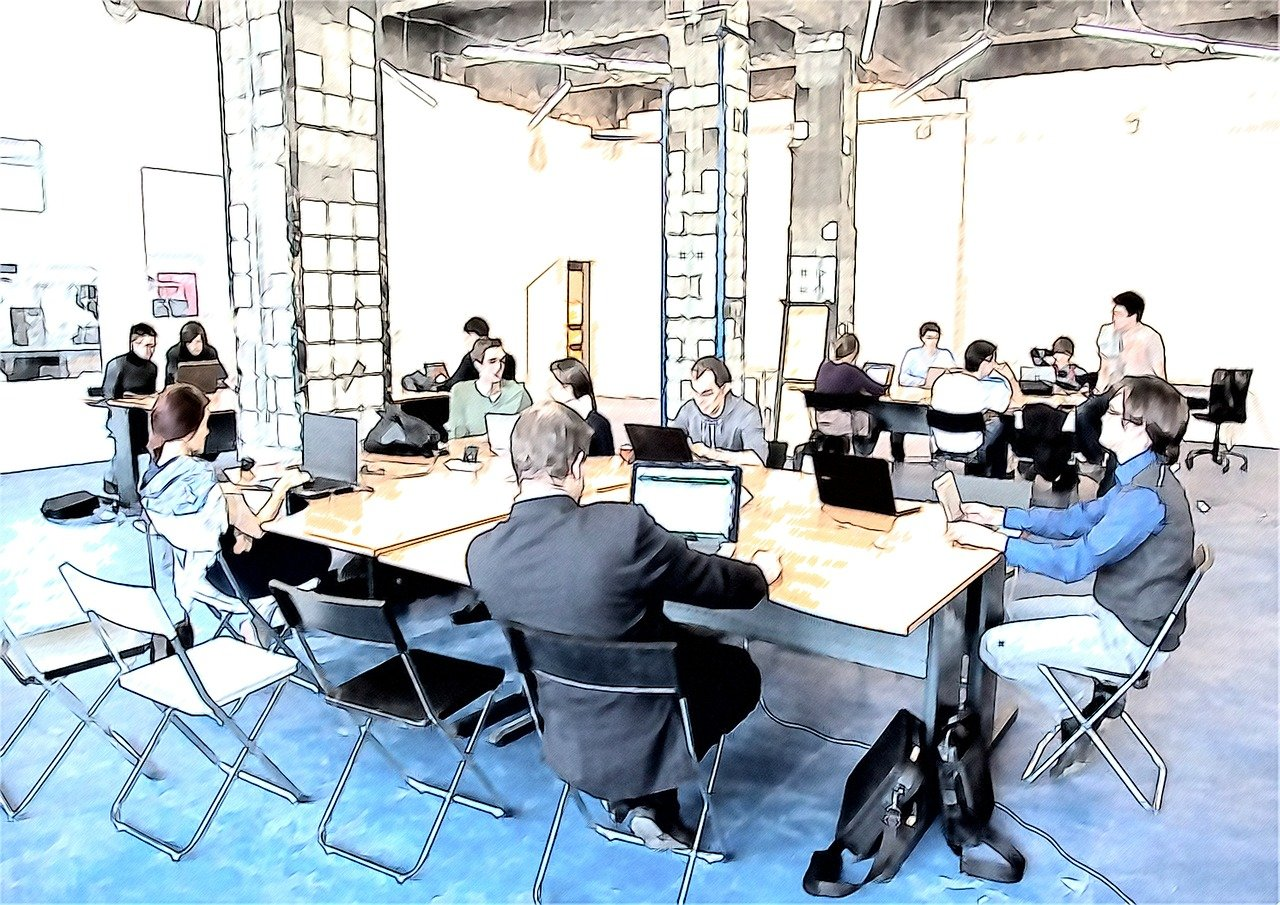

**Student Name:** Perera H.L.D.U.G <br>
**Registration Number:** EG/2020/4112<br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [191]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

## Data Loading

In [192]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
df = pd.read_csv('data/Placement_Data_Full_Class.csv')
# Print the first five rows of the loaded dataframe

# Your code goes here
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [193]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop(['sl_no'], axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis (EDA)

In [194]:
# Identify the shape of the loaded dataframe

# Your code goes here
df.shape

(215, 14)

In [195]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**
><br><br>

Categorical features:<br><br>

01.gender: Gender- Male='M',Female='F'<br>
02.ssc_b: Board of Education- Central/ Others<br>
03.hsc_b: Board of Education- Central/ Others<br>
04.hsc_s: Specialization in Higher Secondary Education<br>
05.degree_t: Under Graduation(Degree type)- Field of degree education<br>
06.workex: Work Experience<br>
07.specialisation: Post Graduation(MBA)- Specialization<br>
08.status: Status of placement- Placed/Not placed<br>


Numerical features:<br><br>

01.ssc_p: Secondary Education percentage- 10th Grade<br>
02.hsc_p: Higher Secondary Education percentage- 12th Grade<br>
03.degree_p: Degree Percentage<br>
04.etest_p: Employability test percentage (conducted by college)<br>
05.mba_p: MBA percentage<br>
06.salary: Salary offered by corporate to candidates<br>


In [196]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:** By visualizing only the train set, it ensures a fair evaluation of the model performance and it evaluates the performance for new unseen data.

In [197]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
X = df.drop(['status'], axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [198]:
# Print number of training data points

# Your code goes here
len(X_train)

172

In [199]:
# Print number of testing data points

# Your code goes here
len(X_test)

43

c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Counts of Placement Status in Training Set')

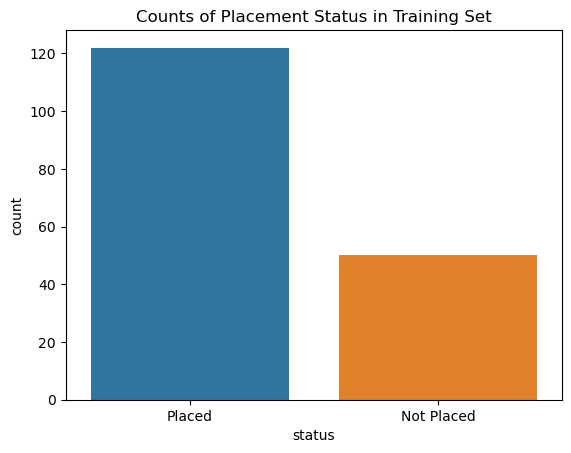

In [200]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
sns.countplot(data=(X_train.join(y_train)), x='status')
plt.title('Counts of Placement Status in Training Set')

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
Yes<br>

1.Imbalanced datasets can lead to biased model performance, where the model may favor the majority class and perform poorly on predicting minority class instances.<br>
2. Imbalanced datasets often have insufficient samples for the minority class, making it challenging for the model to learn patterns and relationships within that class.<br>
3. Overfitting to Majority Class<br>



c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

Text(0.5, 1.0, 'Status of Placement based on Gender')

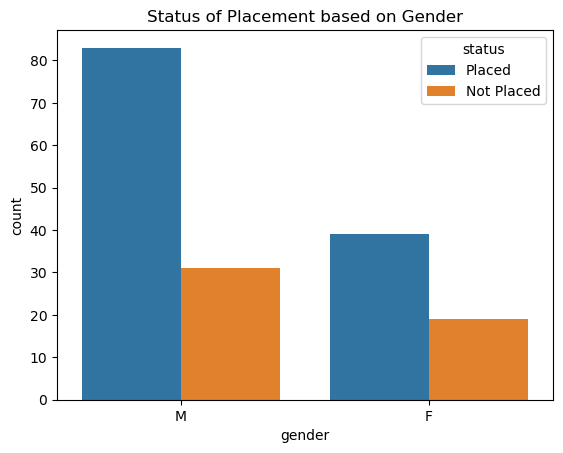

In [201]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
sns.countplot(data=(X_train.join(y_train)), x='gender', hue='status')
plt.title('Status of Placement based on Gender')

**Q:** Explain the observation from the above table.
> **A: There are more male students placed compared to female students. Additionally, there are also more male students who have not been placed compared to female students. but difference in Not Placed is less than in Placed.**

c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

Text(0.5, 1.0, 'Status of Placement based on Specialisation')

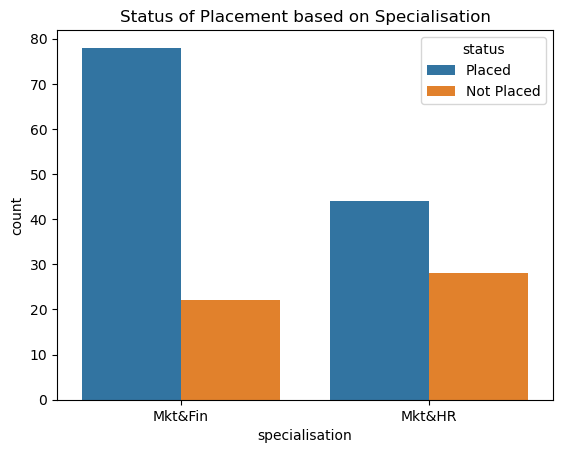

In [202]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
sns.countplot(data=(X_train.join(y_train)), x='specialisation', hue='status')
plt.title('Status of Placement based on Specialisation')

**Q:** Inteprete the above results.
> **A: There is a higher percentage of students are placed in Mkt&Fin than in Mkt&HR.
Additionally there is a higher percentage of students are Not placed in Mkt&HR than in Mkt&Fin.**

c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'MBA Percentage based on Placement')

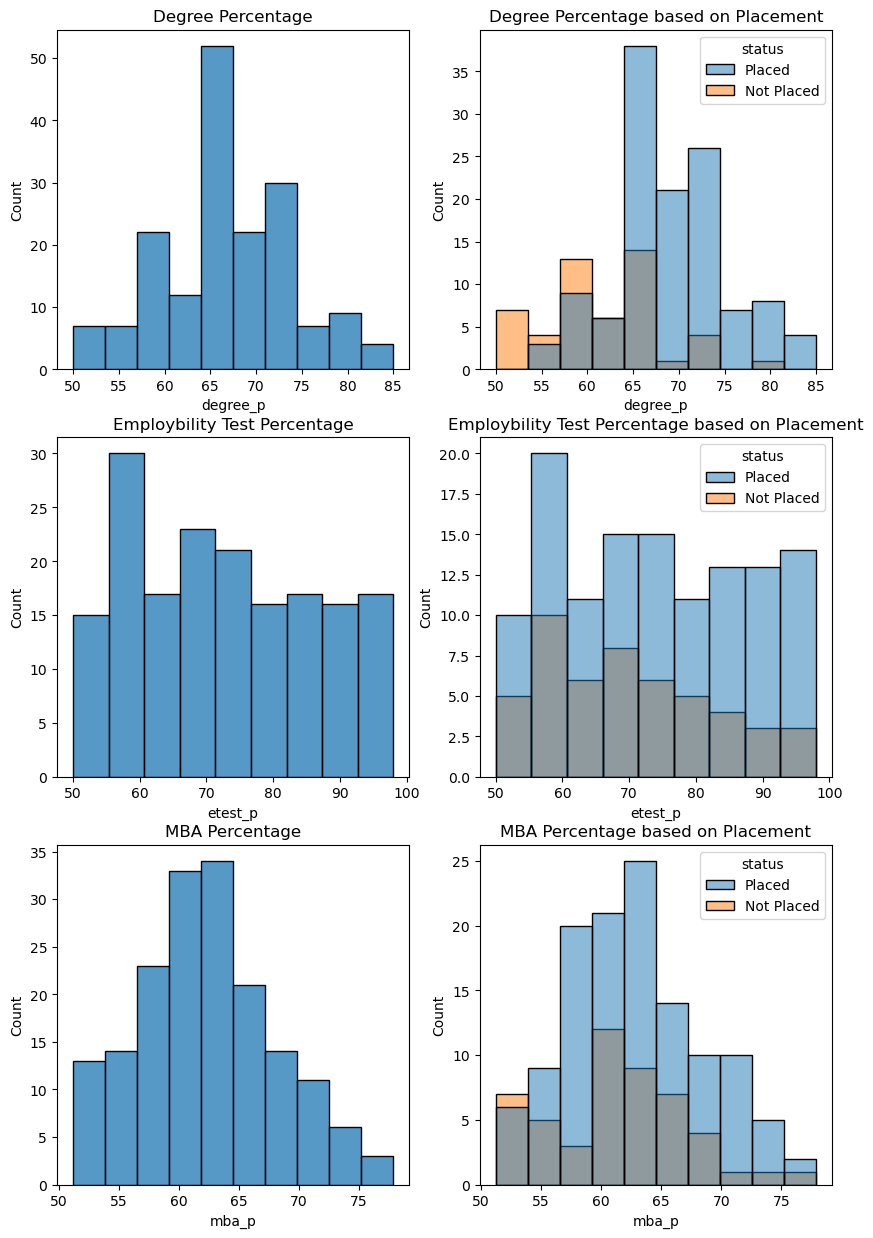

In [203]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here
df_train = X_train.join(y_train)

fig, axes = plt.subplots(3, 2, figsize=(10,15))

sns.histplot(data=df_train, x='degree_p', ax=axes[0, 0])
axes[0, 0].set_title('Degree Percentage')
sns.histplot(data=df_train, x='etest_p', ax=axes[1, 0])
axes[1, 0].set_title('Employbility Test Percentage')
sns.histplot(data=df_train, x='mba_p', ax=axes[2, 0])
axes[2, 0].set_title('MBA Percentage')

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here
sns.histplot(data=df_train, x='degree_p', hue='status', ax=axes[0, 1])
axes[0, 1].set_title('Degree Percentage based on Placement')
sns.histplot(data=df_train, x='etest_p', hue='status', ax=axes[1, 1])
axes[1, 1].set_title('Employbility Test Percentage based on Placement')
sns.histplot(data=df_train, x='mba_p', hue='status', ax=axes[2, 1])
axes[2, 1].set_title('MBA Percentage based on Placement')

**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**
<br>
Distribution of Degree Percentage:This plot shows the distribution of the degree percentage of the students. The x-axis shows the degree percentage, and the y-axis shows the number of students. The plot shows that the majority of students have a degree percentage between around 60% and 68%.<br>
Distribution of Employability Test Percentage:This plot shows the distribution of the employability test percentage of the students. The x-axis shows the employability test percentage, and the y-axis shows the number of students. The plot shows that the majority of students have an employability test percentage between around 55% and 63%.
<br>
Distribution of MBA Percentage:This plot shows the distribution of the MBA percentage of the students. The x-axis shows the MBA percentage, and the y-axis shows the number of students. The plot shows that the majority of students have an MBA percentage between 55% and 65%.
<br>
Most of the time Count of Placed is higher than Not placed.
But when Degree precentage around between 50% to 62% got higher Not placed count.


In [204]:
# Check for the null values in train set

# Your code goes here
X_train.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            50
dtype: int64

In [205]:
# Check for the null values in test set

# Your code goes here
X_test.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            17
dtype: int64

<Axes: >

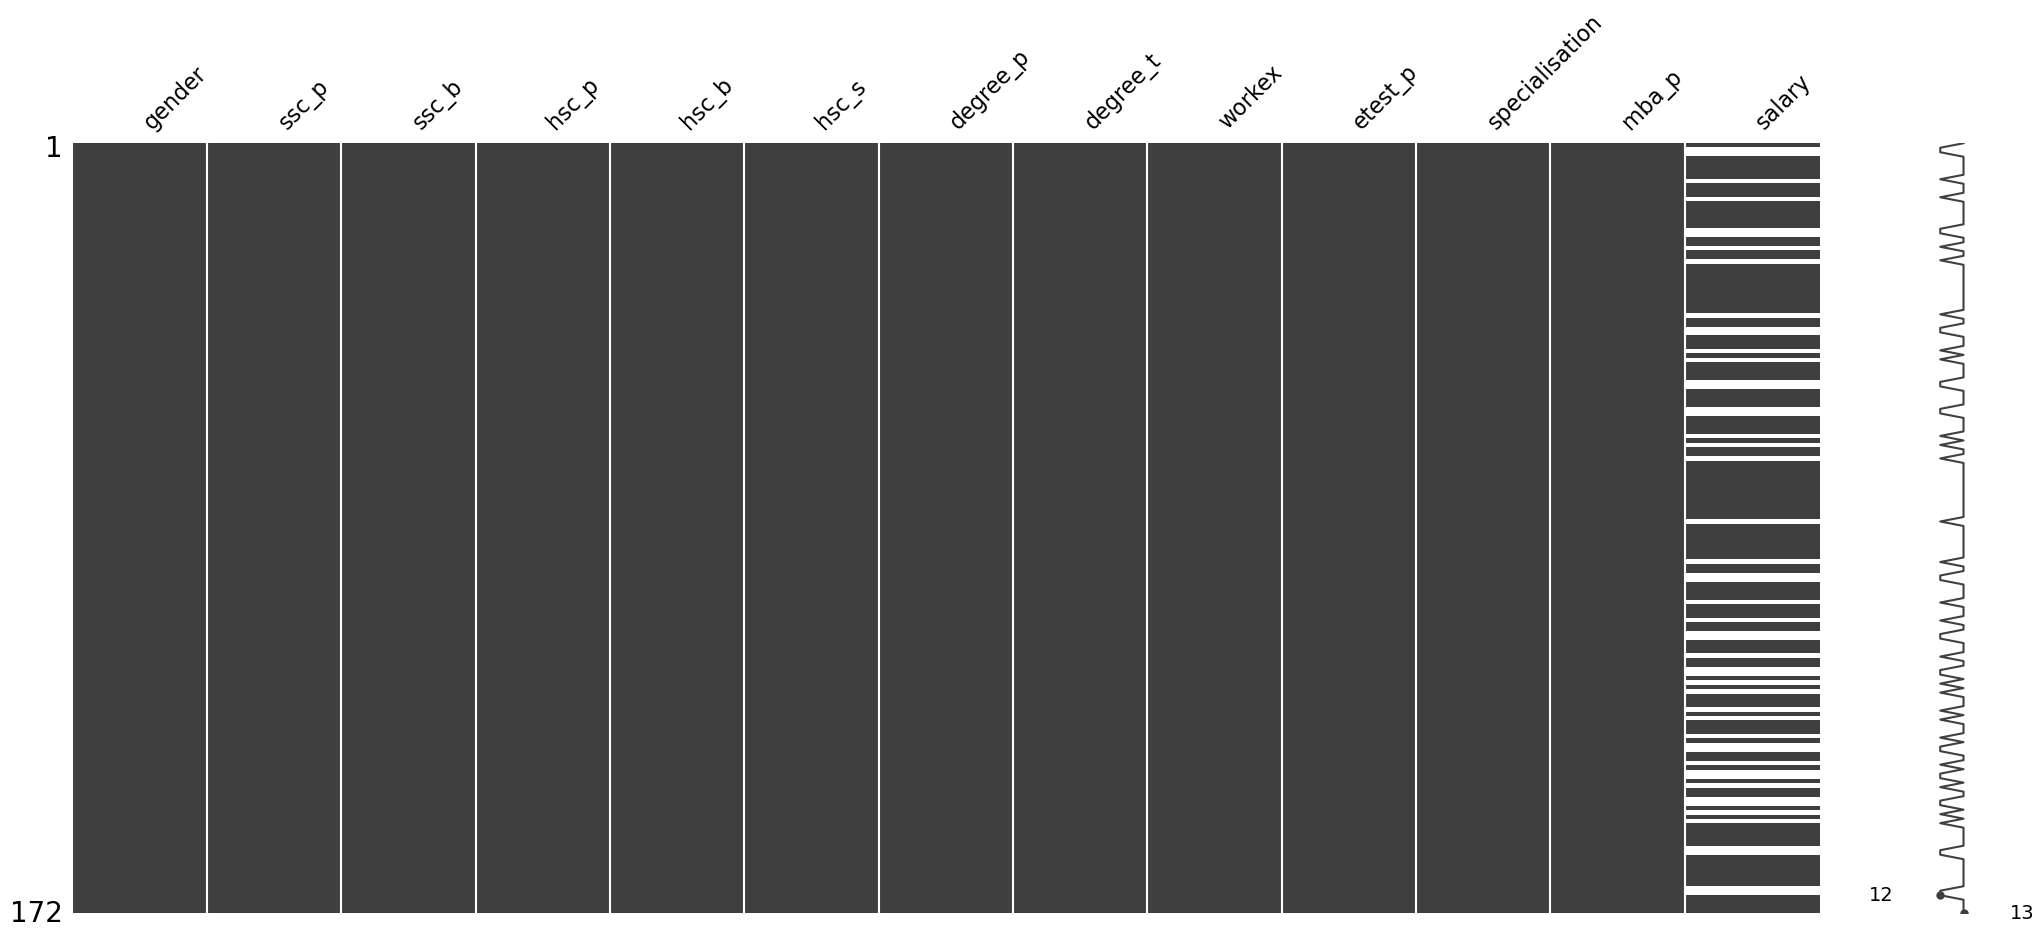

In [206]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
msno.matrix(X_train)

## Data Preprocessing

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A: Only salary column has some missing data.
Mean value is replaced with the null(Missing) values.**


### Handle the Missing Data

In [207]:
# Handle the missing data

# Your code goes here
X_train['salary'] = X_train['salary'].fillna(X_train['salary'].mean())

<Axes: >

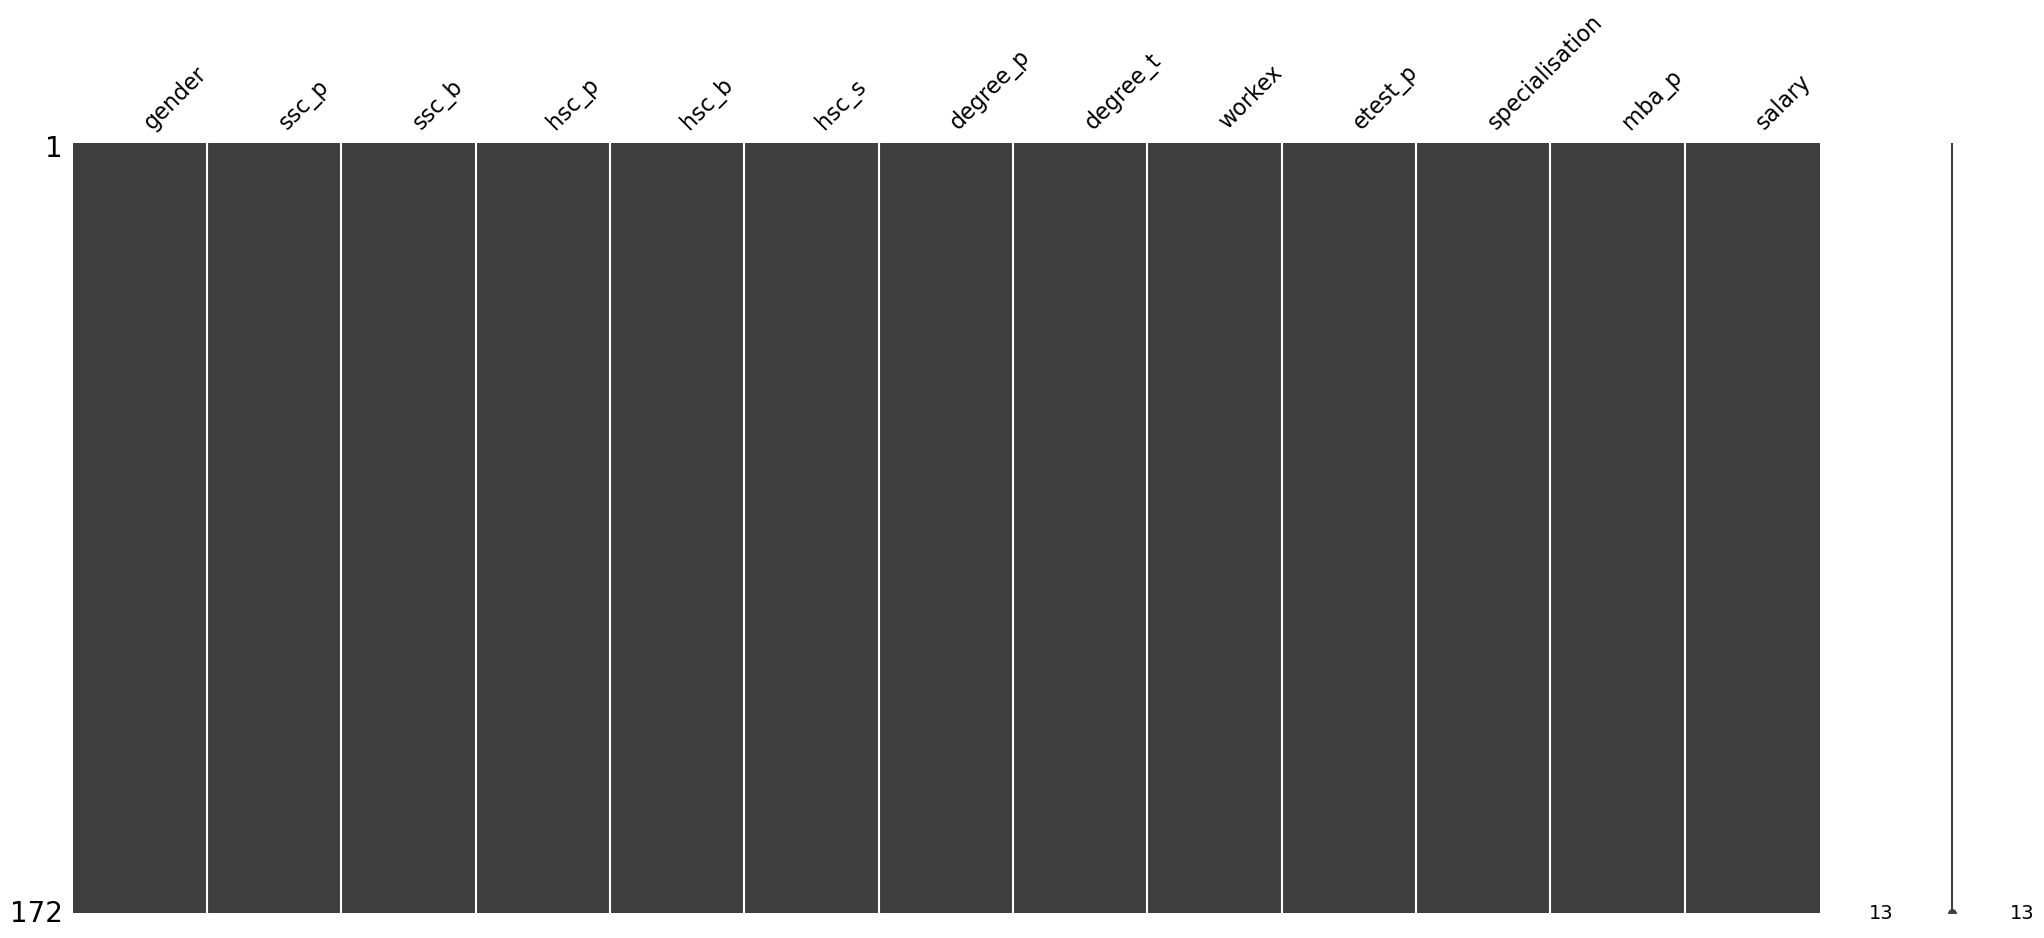

In [208]:
# Test the training dataset after processing the null values

# Your code goes here
msno.matrix(X_train)

In [209]:
# Process the null values in the test set

# Your code goes here
X_test['salary'] = X_test['salary'].fillna(X_test['salary'].mean())

<Axes: >

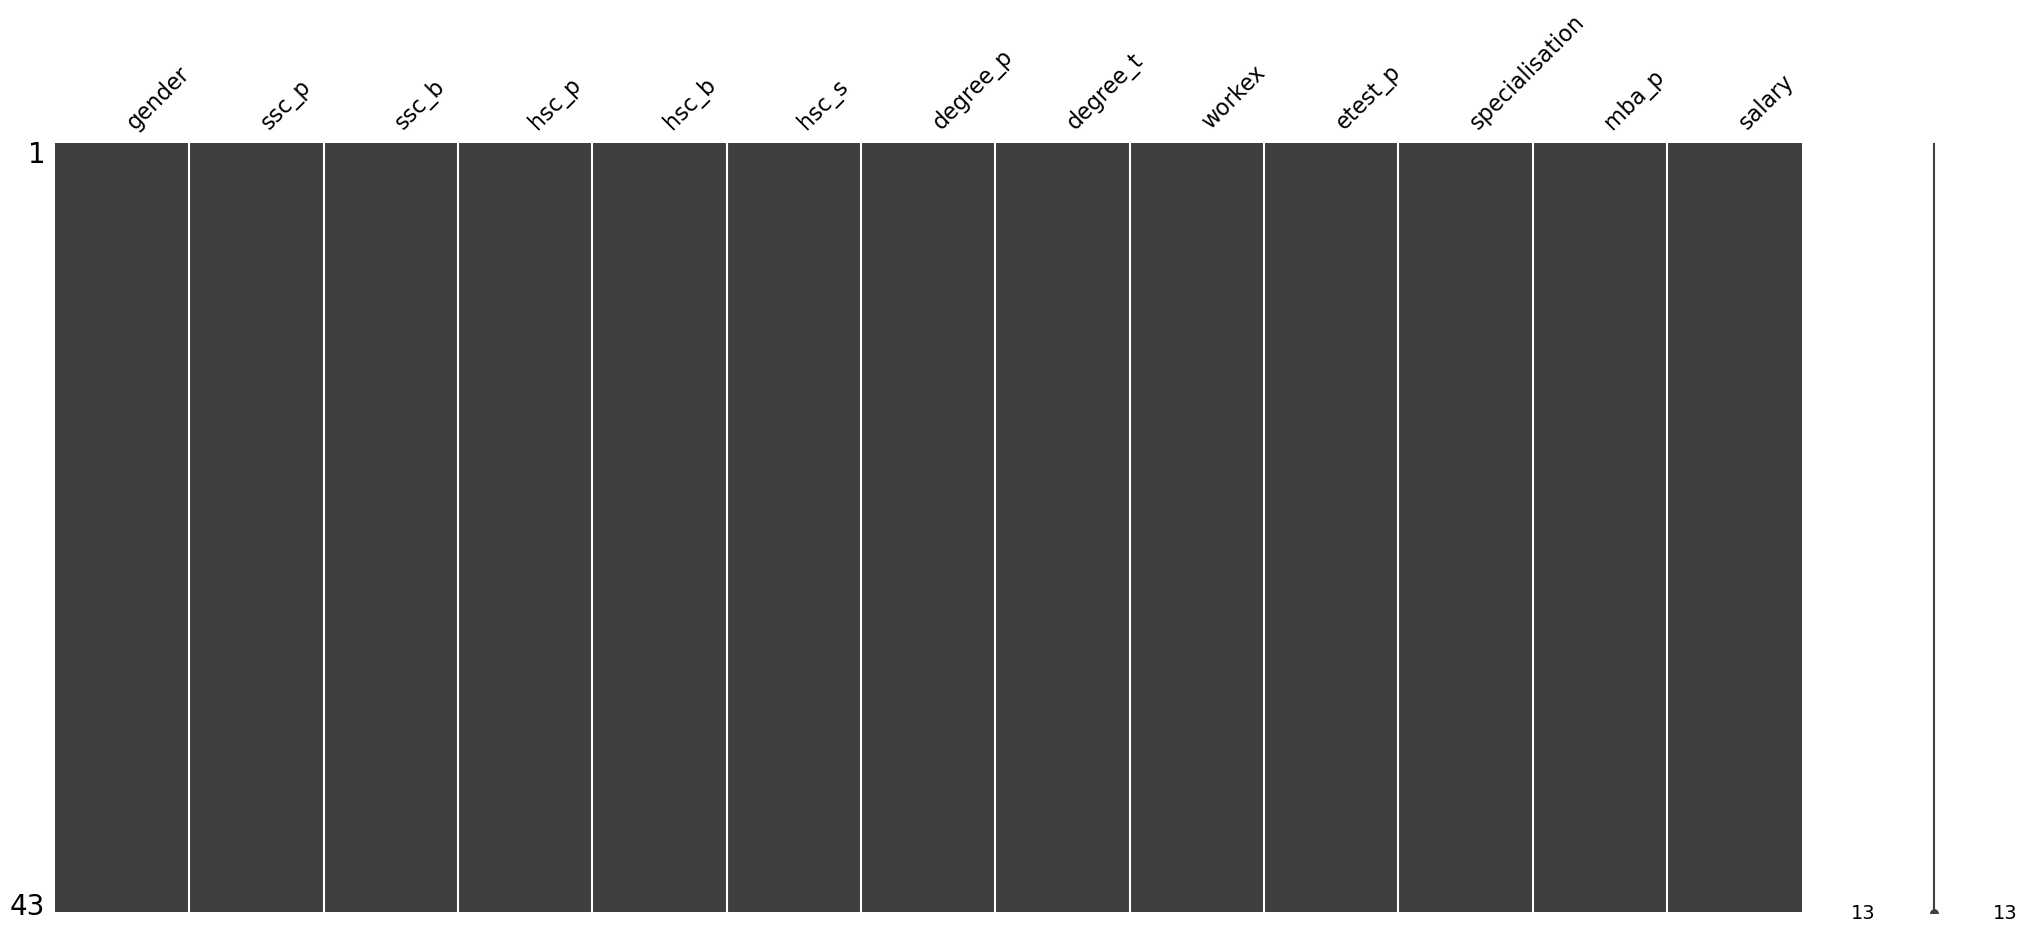

In [210]:
# Test the testing dataset after processing the null values

# Your code goes here
msno.matrix(X_test)

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A: This dataset has nominal categories. Because One-Hot Encoding has been used to encode the categorical columns. Since this is a binary classification, For the 'status' column, which represents whether a student is 'Placed' or 'Not Placed', used Label Encoding.**

In [211]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# List the categorical features

# Your code goes here
X_categorical_features = X_train.select_dtypes(include='object').columns
print(X_categorical_features)

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
enc = make_column_transformer((OneHotEncoder(), X_categorical_features), remainder='passthrough')

# Encode the training features

# Your code goes here
X_train_encoded = pd.DataFrame(enc.fit_transform(X_train))

encoded_feature_names = enc.named_transformers_['onehotencoder'].get_feature_names_out(X_categorical_features)
all_feature_names = list(encoded_feature_names) + list(X_train.select_dtypes(exclude='object').columns)
X_train_encoded.columns = all_feature_names

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')


In [212]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train_encoded.dtypes

gender_F                  float64
gender_M                  float64
ssc_b_Central             float64
ssc_b_Others              float64
hsc_b_Central             float64
hsc_b_Others              float64
hsc_s_Arts                float64
hsc_s_Commerce            float64
hsc_s_Science             float64
degree_t_Comm&Mgmt        float64
degree_t_Others           float64
degree_t_Sci&Tech         float64
workex_No                 float64
workex_Yes                float64
specialisation_Mkt&Fin    float64
specialisation_Mkt&HR     float64
ssc_p                     float64
hsc_p                     float64
degree_p                  float64
etest_p                   float64
mba_p                     float64
salary                    float64
dtype: object

In [213]:
# Encode the testing features

# Your code goes here
X_test_encoded = pd.DataFrame(enc.fit_transform(X_test))

X_test_encoded.columns = all_feature_names

In [214]:
# Encode the target variable in train and test sets

# Your code goes here
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [215]:
# Print the encoded labels for the training set

# Your code goes here
y_train_encoded

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [216]:
X_train_encoded.head()

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,...,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,72.0,63.0,77.5,78.00,54.48,250000.000000
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,56.0,52.0,52.0,66.00,59.43,289393.442623
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,67.9,62.0,67.0,58.10,75.71,289393.442623
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,85.0,90.0,82.0,92.00,68.03,300000.000000
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,61.0,81.0,66.4,50.89,62.21,278000.000000


In [217]:
X_test_encoded.head()

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,...,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,51.00,54.00,61.00,60.00,60.64,285192.307692
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,72.00,60.00,69.00,55.50,58.40,250000.000000
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,52.00,55.00,56.30,59.00,64.74,285192.307692
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,56.28,62.83,59.79,60.00,57.29,285192.307692
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,59.96,42.16,61.26,54.48,65.48,285192.307692


### Scale the Numerical Features

In [218]:
# Standard Scale the numerical features
X_numerical_features = X_train.select_dtypes(include='number').columns

scaler = make_column_transformer((StandardScaler(), X_numerical_features), remainder='passthrough')

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded))
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded))

In [219]:
# Display the head of the scaled training set
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.370700,-0.392496,1.515823,0.400312,-1.355651,-4.852262e-01,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,-1.120487,-1.424877,-2.020259,-0.492316,-0.501907,-2.867876e-15,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,-0.011417,-0.486349,0.059789,-1.079963,2.305959,-2.867876e-15,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.582289,2.141530,2.139838,1.441711,0.981363,1.306456e-01,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.654491,1.296855,-0.023413,-1.616284,-0.022432,-1.403380e-01,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [220]:
# Display the head of the scaled testing set
X_test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.586483,-1.237171,-0.772230,-0.938630,-0.293215,-0.051747,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.370700,-0.674054,0.337129,-1.273366,-0.679555,-0.485226,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.493284,-1.143318,-1.423979,-1.013016,0.413926,-0.051747,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.094391,-0.408451,-0.940021,-0.938630,-0.871000,-0.051747,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.751418,-2.348388,-0.736176,-1.349239,0.541556,-0.051747,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1: SMOTE helps with imbalanced datasets by creating new examples for the minority class. This balances the classes without losing important data.**<br>
> **A2 (Advantage): It generates synthetic values without duplicating**

In [221]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_encoded)

c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\umesh\.conda\envs\ML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

Text(0.5, 1.0, 'Status after resampling')

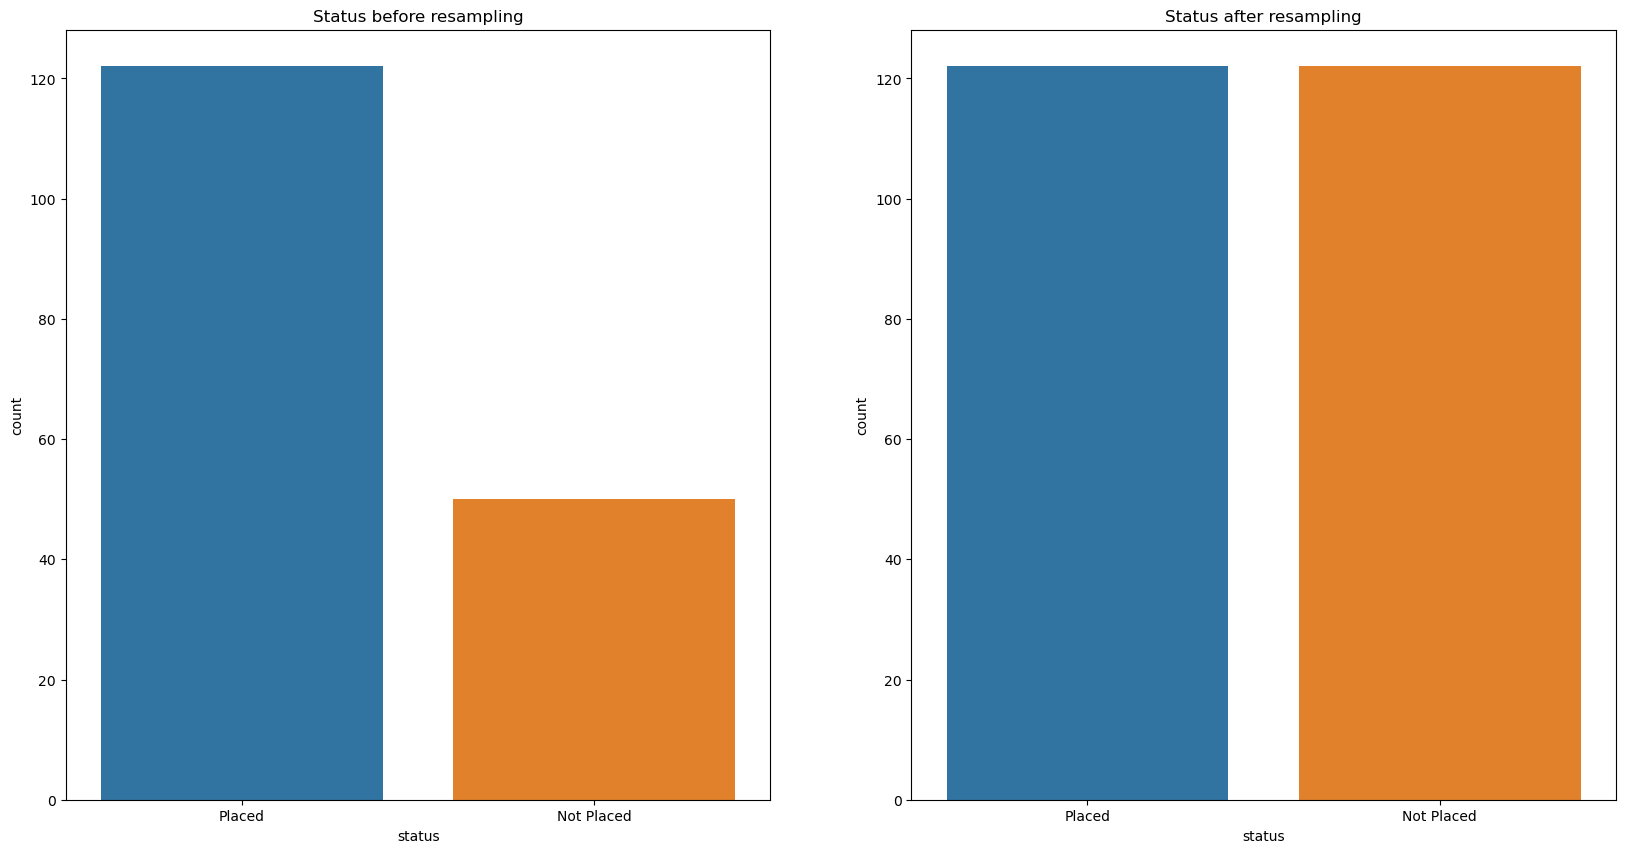

In [222]:
# plot the count plots side by side before and after resampling

# Your code goes here
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title('Status before resampling')

plt.subplot(1,2,2)
sns.countplot(x=y_train_oversampled)
plt.xlabel('status')
new_labels = ['Placed', 'Not Placed']
plt.xticks(ticks=plt.xticks()[0], labels=new_labels)
plt.title('Status after resampling')


As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A: No, By adding more examples to the testing set, we lose the chance to see how well the model handles new, real-world data. This defeats the purpose of testing, which is to check how the model works with unseen data.**

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [223]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline

In [224]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
imbalanced_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42))
])

In [225]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A: Stratified K-Folds cross-validation is important because it ensures that each fold of the dataset contains a similar proportion of samples from each class. This helps reduce bias in the evaluation process, ensuring that the model's performance is accurately assessed across all classes.**

In [226]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': [0.1, 0.01, 'scale', 'auto']
}

In [227]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=imbalanced_pipeline, param_grid=param_grid, cv=k_fold, scoring='accuracy')

In [228]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier', SVC(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__gamma': [0.1, 0.01, 'scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [229]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
grid_search.best_score_

0.8783193277310923

In [230]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
grid_search.best_params_

{'classifier__C': 1.0, 'classifier__gamma': 0.1, 'classifier__kernel': 'poly'}

In [231]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_estimator = grid_search.best_estimator_

### Model Evaluation

In [232]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train_oversampled, y_train_oversampled)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', SVC(gamma=0.1, kernel='poly', random_state=42))])

In [233]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
y_pred_train = best_estimator.predict(X_train_oversampled)

accuracy = accuracy_score(y_train_oversampled, y_pred_train)
print(accuracy)

0.9590163934426229


In [234]:
# Calculate the accuracy for the test set

# Your code goes here
y_pred_test = best_estimator.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred_test)
print(accuracy)

0.9069767441860465


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A: The model's testing accuracy closely matches its training accuracy, suggesting that the model is not overfitting. This indicates that the model has successfully learned the patterns present in the training data and can generalize well to new, unseen data.**

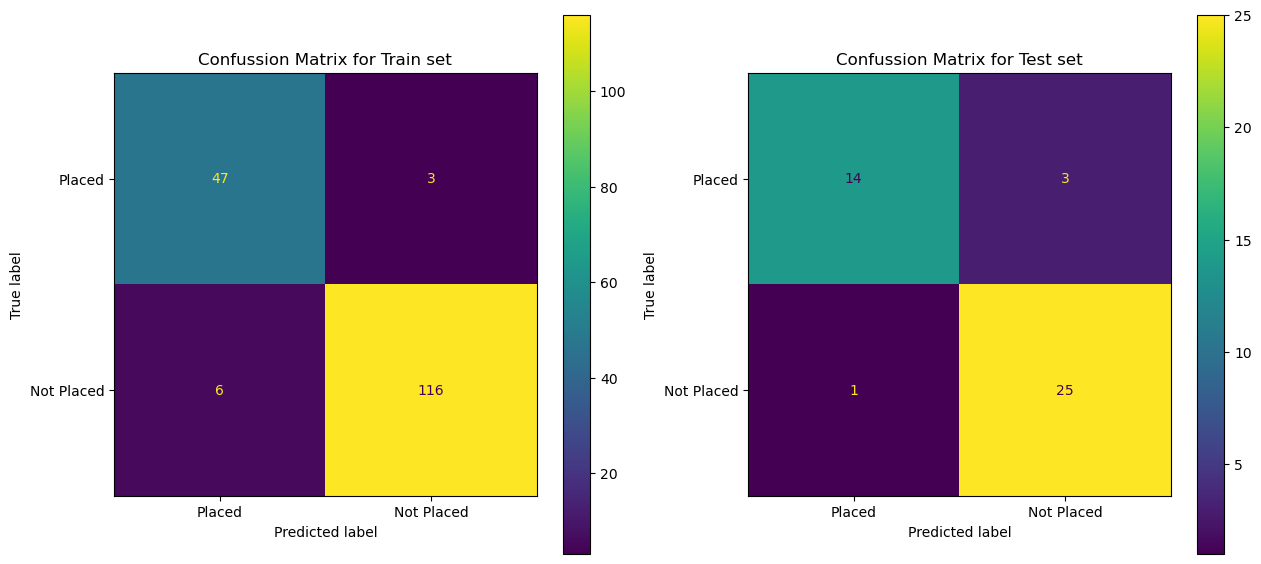

In [235]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here
fig, axes = plt.subplots(1, 2, figsize=(15,7))

ConfusionMatrixDisplay.from_estimator(
    best_estimator, X_train_scaled, y_train_encoded,
    display_labels=["Placed", "Not Placed"], ax=axes[0])
axes[0].set_title('Confussion Matrix for Train set')
ConfusionMatrixDisplay.from_estimator(
    best_estimator, X_test_scaled, y_test_encoded,
    display_labels=["Placed", "Not Placed"], ax=axes[1])
axes[1].set_title('Confussion Matrix for Test set')
plt.show()

**Q:** Comment about the obtained confusion matrices. <br>
> **A: Both confusion matrices show a high true positive rate and a low false positive rate, indicating that the model has made correct predictions for most instances.**

In [236]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
print(classification_report(y_test_encoded, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.89      0.96      0.93        26

    accuracy                           0.91        43
   macro avg       0.91      0.89      0.90        43
weighted avg       0.91      0.91      0.91        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**
> The classification report indicates that the model has good precision for both classes, reflecting the accuracy of positive predictions made by the model.<br>
> Additionally, both classes exhibit good recall, signifying the model's ability to identify all positive instances.<br>
> The f1-score is particularly important in cases of class imbalance, as it provides a balanced measure of a model's accuracy across both classes. In our trained model, there is a favorable f1-score for both classes, indicating a good overall performance.<br>

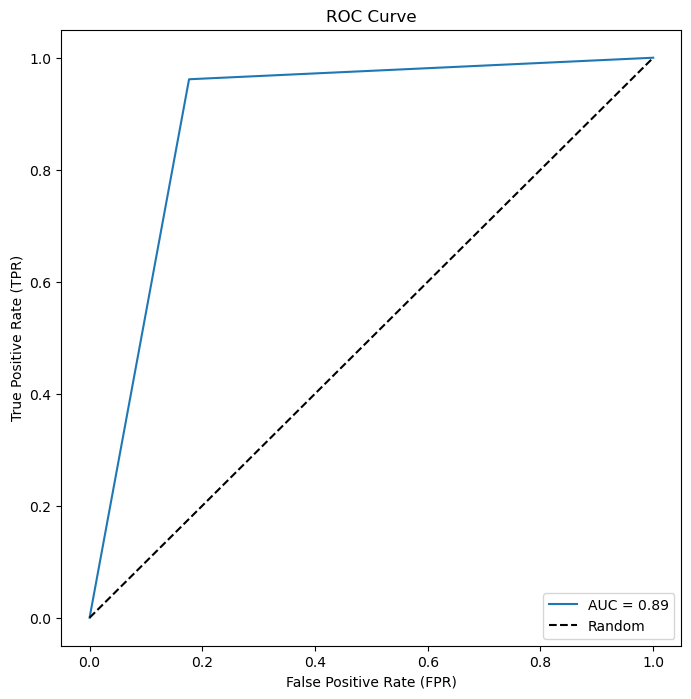

0.8925339366515838


In [237]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_test)
auc_value = roc_auc_score(y_test_encoded, y_pred_test)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(auc_value)

**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**

The ROC curve visually depicts the trade-off between the True Positive Rate and False Positive Rate at different classification thresholds.<br> The AUC value provides a summary of the model's performance across all possible thresholds.<br>
The ROC curve demonstrates that the estimator can achieve a high True Positive Rate while keeping the False Positive Rate low.<br>
With an AUC value of 0.89, which is greater than 0.5, the estimator effectively distinguishes between positive and negative classes.<br>
Both the ROC curve and the AUC values indicate that the estimator performs well for both classes, demonstrating its effectiveness in classification.